## <font color=blue>Javier Antonio García Perdomo </font>
## <font color=red>21004161</font>
## Maestría en Data Science
## <font color=green>Ciencia de Datos en Python V </font>
## <font color=red>05/03/2021</font>

# <h1><center><font color=green>Proyecto Final</font>  

<b>Descripción</b>: El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:
<center> y = β0 + β1 ∗ x

A continuación se le listan los pasos que debería seguir para poder desarrollar su proyecto:

    1. Crear un entorno de anaconda con los paquetes que considere necesarios.

In [1]:
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

    2. Usando slicing con NumPy separar los datos en 2 datasets: entrenamiento (80 %) y    validación y pruebas(20 %).

In [2]:
All_data0 = np.load(os.path.expanduser("~/Desktop/proyecto_training_data.npy"))
cantidad_datos=np.count_nonzero(All_data0[:,0])

Y=All_data0[:,0]
X1=All_data0[:,1]
X2=All_data0[:,2]
X3=All_data0[:,3]
X4=All_data0[:,4]
X5=All_data0[:,5]
df = pd.DataFrame()
df['SalePrice']=pd.Series(Y)
df['OverallQual']=pd.Series(X1)
df['1stFlrSF']=pd.Series(X2)
df['TotRmsAbvGrd']=pd.Series(X3)
df['YearBuilt']=pd.Series(X4)
df['LotFrontage']=pd.Series(X5)
print("Previsualización de los datos:")
print(df.head())
 
indices_validacion=random.sample(range(0, cantidad_datos), int(cantidad_datos/5))
indices_validacion.sort()
indices_entrenamiento=[]
for i in range(0,cantidad_datos):
    if i not in indices_validacion:
        indices_entrenamiento.append(i)
        
df_entrenamiento = df.iloc[indices_entrenamiento,:]

print("\n")
print("Previsualización de los datos de entrenamiento:")
print(df_entrenamiento.head())
print("Cantidad de datos para entrenamiento (80%): ",len(indices_entrenamiento))
    
data_validacion=[]
for i in indices_validacion:
    data_validacion.append(All_data0[i])
print("\n")

df_validacion = df.iloc[indices_validacion,:]
print("Previsualización de los datos de validacion:")
print(df_validacion.head())
print("Cantidad de datos para validación y pruebas (20%): ",len(data_validacion))

Previsualización de los datos:
   SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0   208500.0          7.0     856.0           8.0     2003.0         65.0
1   181500.0          6.0    1262.0           6.0     1976.0         80.0
2   223500.0          7.0     920.0           6.0     2001.0         68.0
3   140000.0          7.0     961.0           7.0     1915.0         60.0
4   250000.0          8.0    1145.0           9.0     2000.0         84.0


Previsualización de los datos de entrenamiento:
   SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
1   181500.0          6.0    1262.0           6.0     1976.0         80.0
2   223500.0          7.0     920.0           6.0     2001.0         68.0
4   250000.0          8.0    1145.0           9.0     2000.0         84.0
5   143000.0          5.0     796.0           5.0     1993.0         85.0
6   307000.0          8.0    1694.0           7.0     2004.0         75.0
Cantidad de datos para entrenam

   3. Análisis exploratorio de datos: Para cada variable en el dataset calcular ((usando numpy o pandas):
* media
* valor máximo
* valor mínimo
* rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1) 
* desviación estándar.

________________________________________________________________________
Y = SalePrice  .   # precio de venta de las propiedades (en $ dólares)

In [3]:
print("Estadísticas de todos los datos de la variable 'SalePrice'")
print(df['SalePrice'].describe())
Y=All_data0[:,0]
print("El precio medio de venta de las propiedades es: $",
      round(np.average(Y),2))
print("El valor de venta máximo es: $", round(np.max(Y),2))
print("El valor de venta mínimo es: $", round(np.min(Y),2))
print("Por lo tanto el rango de venta es: $", round(np.ptp(Y),2))
print("La desviación estándar para el precio de venta es: $", round(np.std(Y),2))
print("\n")
print("Usando sólo el 80% de los datos de entrenamiento:")
Y_entrenamiento=df_entrenamiento['SalePrice'].tolist()
print("El precio medio de venta de las propiedades es: $",
      round(np.average(Y_entrenamiento),2))
print("El valor de venta máximo es: $", round(np.max(Y_entrenamiento),2))
print("El valor de venta mínimo es: $", round(np.min(Y_entrenamiento),2))
print("Por lo tanto el rango de venta es: $", round(np.ptp(Y_entrenamiento),2))
print("La desviación estándar para el precio de venta es: $", round(np.std(Y_entrenamiento),2))

Estadísticas de todos los datos de la variable 'SalePrice'
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
El precio medio de venta de las propiedades es: $ 180921.2
El valor de venta máximo es: $ 755000.0
El valor de venta mínimo es: $ 34900.0
Por lo tanto el rango de venta es: $ 720100.0
La desviación estándar para el precio de venta es: $ 79415.29


Usando sólo el 80% de los datos de entrenamiento:
El precio medio de venta de las propiedades es: $ 182480.64
El valor de venta máximo es: $ 755000.0
El valor de venta mínimo es: $ 34900.0
Por lo tanto el rango de venta es: $ 720100.0
La desviación estándar para el precio de venta es: $ 81319.04


________________________________________________________________________
X1 = OverallQual    .   # Calidad general del material y el acabado, califica el material general y el acabado de la casa.
- 10	Very Excellent
- 9	Excellent
- 8	Very Good
- 7	Good
- 6	Above Average
- 5	Average
- 4	Below Average
- 3	Fair
- 2	Poor
- 1	Very Poor

In [4]:
print("Estadísticas de los datos variable: OverallQual")
print(df['OverallQual'].describe())
X1=All_data0[:,1]
print("- El promedio del 'Material general y calidad de acabados', es de:",
      round(np.average(X1),3)," (escala de 1 a 10)")
print("- El valor máximo para 'Material general y calidad de acabados' es: ",
      round(np.max(X1),2))
print("- El valor mínimo para 'Material general y calidad de acabados' es: ", 
      round(np.min(X1),2))
print("- Por lo tanto el rango para 'Material general y calidad de acabados' es: ", 
      round(np.ptp(X1),2))
print("- La desviación estándar para 'Material general y calidad de acabados' es: ", 
      round(np.std(X1),2))
print("\n")
print("Usando sólo el 80% de los datos de entrenamiento:")
X1_entrenamiento=df_entrenamiento['OverallQual'].tolist()
print("- El promedio del 'Material general y calidad de acabados', es de:",
      round(np.average(X1_entrenamiento),3)," (escala de 1 a 10)")
print("- El valor máximo para 'Material general y calidad de acabados' es: ",
      round(np.max(X1_entrenamiento),2))
print("- El valor mínimo para 'Material general y calidad de acabados' es: ", 
      round(np.min(X1_entrenamiento),2))
print("- Por lo tanto el rango para 'Material general y calidad de acabados' es: ", 
      round(np.ptp(X1_entrenamiento),2))
print("- La desviación estándar para 'Material general y calidad de acabados' es: ", 
      round(np.std(X1_entrenamiento),2))

Estadísticas de los datos variable: OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
- El promedio del 'Material general y calidad de acabados', es de: 6.099  (escala de 1 a 10)
- El valor máximo para 'Material general y calidad de acabados' es:  10.0
- El valor mínimo para 'Material general y calidad de acabados' es:  1.0
- Por lo tanto el rango para 'Material general y calidad de acabados' es:  9.0
- La desviación estándar para 'Material general y calidad de acabados' es:  1.38


Usando sólo el 80% de los datos de entrenamiento:
- El promedio del 'Material general y calidad de acabados', es de: 6.128  (escala de 1 a 10)
- El valor máximo para 'Material general y calidad de acabados' es:  10.0
- El valor mínimo para 'Material general y calidad de acabados' es:  2.0
- Por lo tanto el rango para 'Material general y calidad d

________________________________________________________________________
X2 = 1stFlrSF     .    #Pies cuadrados del primer piso

In [5]:
print("Estadísticas de los datos variable: 1stFlrSF")
print(df['1stFlrSF'].describe())
X2=All_data0[:,2]
print("- El promedio del área del primer piso de las propiedades es de:",
      round(np.average(X2),2),"ft²")
print("- El área máxima del primer piso de las propiedades es: ", 
      round(np.max(X2),2),"ft²")
print("- El área mínima del primer piso de las propiedades es: ", 
      round(np.min(X2),2),"ft²")
print("- Por lo tanto el rango para el área del primer piso de las propiedades es: ", 
      round(np.ptp(X2),2),"ft²")
print("- La desviación estándar para el área del primer piso de las propiedades es: ", 
      round(np.std(X2),2),"ft²")
print("\n")
print("Usando sólo el 80% de los datos de entrenamiento:")
X2_entrenamiento=df_entrenamiento['1stFlrSF'].tolist()
print("- El promedio del área del primer piso de las propiedades es de:",
      round(np.average(X2_entrenamiento),2),"ft²")
print("- El área máxima del primer piso de las propiedades es: ", 
      round(np.max(X2_entrenamiento),2),"ft²")
print("- El área mínima del primer piso de las propiedades es: ", 
      round(np.min(X2_entrenamiento),2),"ft²")
print("- Por lo tanto el rango para el área del primer piso de las propiedades es: ", 
      round(np.ptp(X2_entrenamiento),2),"ft²")
print("- La desviación estándar para el área del primer piso de las propiedades es: ", 
      round(np.std(X2_entrenamiento),2),"ft²")

Estadísticas de los datos variable: 1stFlrSF
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64
- El promedio del área del primer piso de las propiedades es de: 1162.63 ft²
- El área máxima del primer piso de las propiedades es:  4692.0 ft²
- El área mínima del primer piso de las propiedades es:  334.0 ft²
- Por lo tanto el rango para el área del primer piso de las propiedades es:  4358.0 ft²
- La desviación estándar para el área del primer piso de las propiedades es:  386.46 ft²


Usando sólo el 80% de los datos de entrenamiento:
- El promedio del área del primer piso de las propiedades es de: 1170.46 ft²
- El área máxima del primer piso de las propiedades es:  4692.0 ft²
- El área mínima del primer piso de las propiedades es:  372.0 ft²
- Por lo tanto el rango para el área del primer piso de las propiedades es:  4320.0 ft²
- La desviación

________________________________________________________________________
X3 = TotRmsAbvGrd   .  # Total de habitaciones sobre rasante (sin incluir baños)

In [6]:
print("Estadísticas de los datos variable: TotRmsAbvGrd")
print(df['TotRmsAbvGrd'].describe())
X3=All_data0[:,3]
print("- El promedio del número de habitaciones sobre rasante es de:",
      round(np.average(X3),2))
print("- El máximo número de habitaciones sobre rasante para una propiedad es de: ", 
      round(np.max(X3),2))
print("- El mínimo número de habitaciones sobre rasante para una propiedad es de: ", 
      round(np.min(X3),2))
print("- El rango para el número de habitaciones sobre rasante de las propiedades es: ", 
      round(np.ptp(X3),2))
print("- La desviación estándar para el # de habitaciones sobre rasante de las propiedades es: ", 
      round(np.std(X3),2))
print("\n")
print("Usando sólo el 80% de los datos de entrenamiento:")
X3_entrenamiento=df_entrenamiento['TotRmsAbvGrd'].tolist()
print("- El promedio del número de habitaciones sobre rasante es de:",
      round(np.average(X3_entrenamiento),2))
print("- El máximo número de habitaciones sobre rasante para una propiedad es de: ", 
      round(np.max(X3_entrenamiento),2))
print("- El mínimo número de habitaciones sobre rasante para una propiedad es de: ", 
      round(np.min(X3_entrenamiento),2))
print("- El rango para el número de habitaciones sobre rasante de las propiedades es: ", 
      round(np.ptp(X3_entrenamiento),2))
print("- La desviación estándar para el # de habitaciones sobre rasante de las propiedades es: ", 
      round(np.std(X3_entrenamiento),2))

Estadísticas de los datos variable: TotRmsAbvGrd
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64
- El promedio del número de habitaciones sobre rasante es de: 6.52
- El máximo número de habitaciones sobre rasante para una propiedad es de:  14.0
- El mínimo número de habitaciones sobre rasante para una propiedad es de:  2.0
- El rango para el número de habitaciones sobre rasante de las propiedades es:  12.0
- La desviación estándar para el # de habitaciones sobre rasante de las propiedades es:  1.62


Usando sólo el 80% de los datos de entrenamiento:
- El promedio del número de habitaciones sobre rasante es de: 6.51
- El máximo número de habitaciones sobre rasante para una propiedad es de:  12.0
- El mínimo número de habitaciones sobre rasante para una propiedad es de:  3.0
- El rango para el número de habitaciones sobre rasante de la

________________________________________________________________________
X4 = YearBuilt   .    # año de la fecha de construcción original

In [7]:
print("Estadísticas de los datos variable: YearBuilt")
print(df['YearBuilt'].describe())
X4=All_data0[:,4]
print("- El promedio del año de las fechas de construcción original es:",
      round(np.average(X4),2))
print("- El año más reciente para las fechas de construcción original es: ", 
      round(np.max(X4),2))
print("- El año más antiguo para las fechas de construcción original es: ", 
      round(np.min(X4),2))
print("- El rango para el año de las fechas de construcción original es: ", 
      round(np.ptp(X4),2))
print("- La desviación estándar para el año de las fechas de construcción original es: ", 
      round(np.std(X4),2))
print("\n")
print("Usando sólo el 80% de los datos de entrenamiento:")
X4_entrenamiento=df_entrenamiento['YearBuilt'].tolist()
print("- El promedio del año de las fechas de construcción original es:",
      round(np.average(X4_entrenamiento),2))
print("- El año más reciente para las fechas de construcción original es: ", 
      round(np.max(X4_entrenamiento),2))
print("- El año más antiguo para las fechas de construcción original es: ", 
      round(np.min(X4_entrenamiento),2))
print("- El rango para el año de las fechas de construcción original es: ", 
      round(np.ptp(X4_entrenamiento),2))
print("- La desviación estándar para el año de las fechas de construcción original es: ", 
      round(np.std(X4_entrenamiento),2))

Estadísticas de los datos variable: YearBuilt
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64
- El promedio del año de las fechas de construcción original es: 1971.27
- El año más reciente para las fechas de construcción original es:  2010.0
- El año más antiguo para las fechas de construcción original es:  1872.0
- El rango para el año de las fechas de construcción original es:  138.0
- La desviación estándar para el año de las fechas de construcción original es:  30.19


Usando sólo el 80% de los datos de entrenamiento:
- El promedio del año de las fechas de construcción original es: 1971.54
- El año más reciente para las fechas de construcción original es:  2009.0
- El año más antiguo para las fechas de construcción original es:  1872.0
- El rango para el año de las fechas de construcción original es:  137.0
- La desviación estándar 

________________________________________________________________________
X5 = LotFrontage     .    # pies lineales de calle conectados a la propiedad

In [8]:
print("Estadísticas de los datos variable: LotFrontage")
print(df['LotFrontage'].describe())
X5=All_data0[:,5] 
contador=0
contador_nan=0
for i in X5:
    if i==0:
        contador+=1
    if i!=i:
        contador_nan+=1  
print(contador, "valores iguales a 0 en la variable original")
print(contador_nan, "valores nan en la variable original")
print("- El promedio de pies lineales de calle conectados a las propiedades es de:",
      round(np.nanmean(X5),2),"ft")
print("- El máximo de pies lineales de calle conectados a una propiedad es de: ", 
      round(np.nanmax(X5),2),"ft")
print("- El mínimo de pies lineales de calle conectados a una propiedad es de: ", 
      round(np.nanmin(X5),2),"ft²")
print("- El rango de pies lineales de calle conectados a las propiedades es de: ",
      round(np.nanmax(X5)-np.nanmin(X5),2),"ft")
print("- La desviación estándar de pies lineales de calle conectados a las propiedades es: ",
      round(np.nanstd(X5),2),"ft")

print("Se tomó la decisión de convertir todos los nan a 0 para el análisis, pues no se tiene más información sobre la variable")
print("\n")
print("Usando sólo el 80% de los datos de entrenamiento:")
X5_entrenamiento=df_entrenamiento['LotFrontage'].tolist()
X5_entrenamiento= [0 if x != x else x for x in X5_entrenamiento]
print("- El promedio de pies lineales de calle conectados a las propiedades es de:",
      round(np.nanmean(X5_entrenamiento),2),"ft")
print("- El máximo de pies lineales de calle conectados a una propiedad es de: ", 
      round(np.nanmax(X5_entrenamiento),2),"ft")
print("- El mínimo de pies lineales de calle conectados a una propiedad es de: ", 
      round(np.nanmin(X5_entrenamiento),2),"ft²")
print("- El rango de pies lineales de calle conectados a las propiedades es de: ",
      round(np.nanmax(X5_entrenamiento)-np.nanmin(X5),2),"ft")
print("- La desviación estándar de pies lineales de calle conectados a las propiedades es: ",
      round(np.nanstd(X5_entrenamiento),2),"ft")

Estadísticas de los datos variable: LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
0 valores iguales a 0 en la variable original
259 valores nan en la variable original
- El promedio de pies lineales de calle conectados a las propiedades es de: 70.05 ft
- El máximo de pies lineales de calle conectados a una propiedad es de:  313.0 ft
- El mínimo de pies lineales de calle conectados a una propiedad es de:  21.0 ft²
- El rango de pies lineales de calle conectados a las propiedades es de:  292.0 ft
- La desviación estándar de pies lineales de calle conectados a las propiedades es:  24.27 ft
Se tomó la decisión de convertir todos los nan a 0 para el análisis, pues no se tiene más información sobre la variable


Usando sólo el 80% de los datos de entrenamiento:
- El promedio de pies lineales de calle conectados a las propiedad

 4. Para cada variable en el dataset usar seaborn (función distplot https://seaborn.pydata. org/generated/seaborn.distplot.html) para graficar un histograma de la variable.
 
<span style='background:orange'> Warning
    This function (seaborn.distplot) is deprecated and will be removed in a future version. Please adapt your code to use one of two new functions:
    
    - displot(), a figure-level function with a similar flexibility over the kind of plot to draw
    
    - histplot(), an axes-level function for plotting histograms, including with kernel density smoothing 
</span>

________________________________________________________________________
Y = SalePrice  

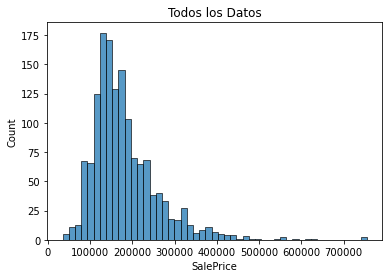

Text(0.5, 1.0, 'Datos entrenamiento')

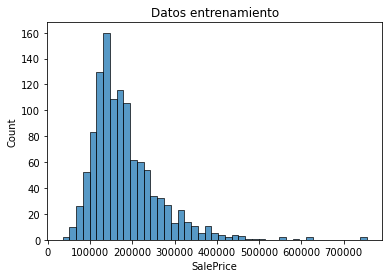

In [9]:
aY = sns.histplot( data=Y)
aY.set_xlabel("SalePrice")
aY.set_title("Todos los Datos")
plt.show()

aY_entrenamiento = sns.histplot( data=Y_entrenamiento)
aY_entrenamiento.set_xlabel("SalePrice")
aY_entrenamiento.set_title("Datos entrenamiento")

________________________________________________________________________
X1 = OverallQual    

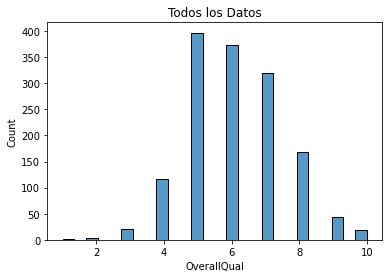

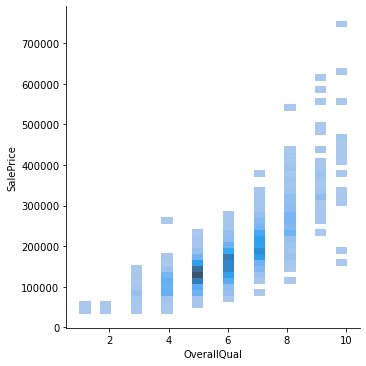

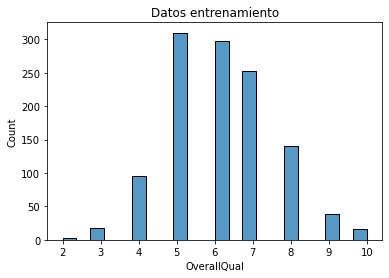

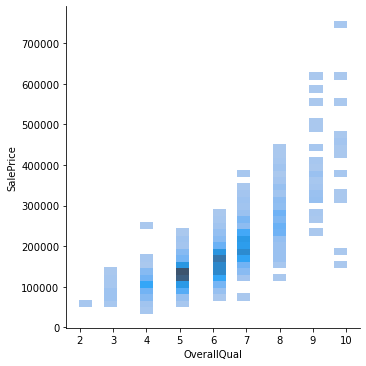

In [10]:
aX1 = sns.histplot(data=X1)
aX1.set_xlabel("OverallQual")
aX1.set_title("Todos los Datos")
bX1 = sns.displot(y=Y, x=X1)
bX1.set_axis_labels("OverallQual", "SalePrice")
plt.show()

aX1_entrenamiento = sns.histplot(data=X1_entrenamiento)
aX1_entrenamiento.set_xlabel("OverallQual")
aX1_entrenamiento.set_title("Datos entrenamiento")
bX1_entrenamiento = sns.displot(y=Y_entrenamiento, x=X1_entrenamiento)
bX1_entrenamiento.set_axis_labels("OverallQual", "SalePrice")


________________________________________________________________________
X2 = 1stFlrSF  

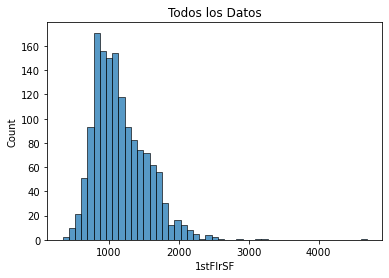

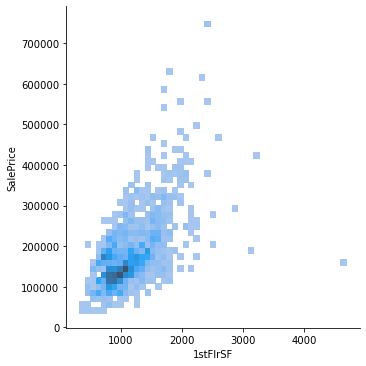

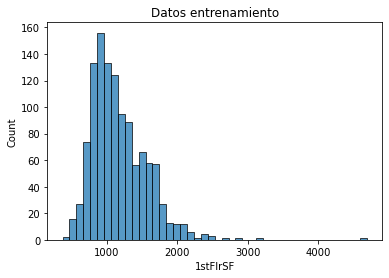

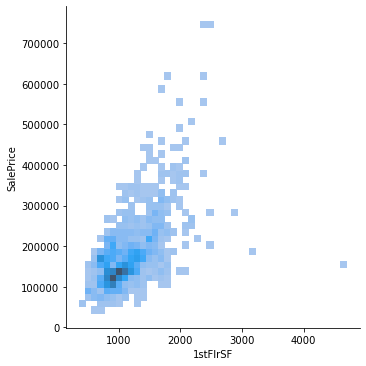

In [11]:
aX2 = sns.histplot(data=X2)
aX2.set_xlabel("1stFlrSF")
aX2.set_title("Todos los Datos")
bX2 = sns.displot(y=Y, x=X2)
bX2.set_axis_labels("1stFlrSF", "SalePrice")
plt.show()

aX2_entrenamiento = sns.histplot(data=X2_entrenamiento)
aX2_entrenamiento.set_xlabel("1stFlrSF")
aX2_entrenamiento.set_title("Datos entrenamiento")
bX2_entrenamiento = sns.displot(y=Y_entrenamiento, x=X2_entrenamiento)
bX2_entrenamiento.set_axis_labels("1stFlrSF", "SalePrice")

________________________________________________________________________
X3 = TotRmsAbvGrd   

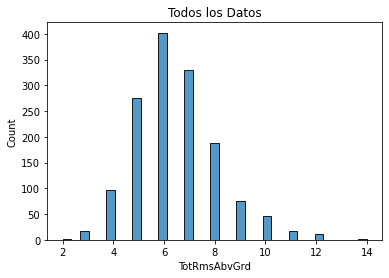

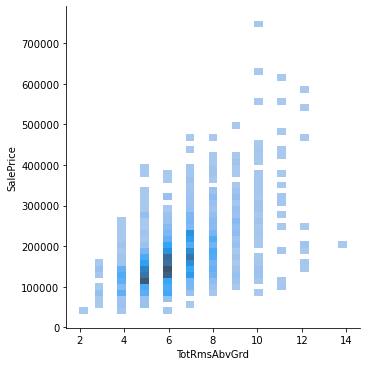

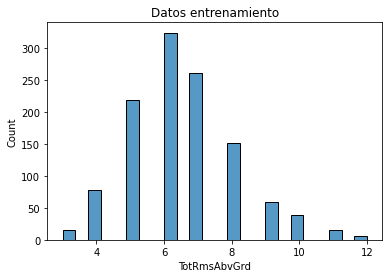

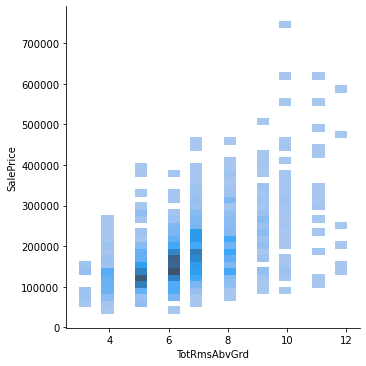

In [12]:
aX3 = sns.histplot(data=X3)
aX3.set_xlabel("TotRmsAbvGrd")
aX3.set_title("Todos los Datos")
bX3 = sns.displot(y=Y, x=X3)
bX3.set_axis_labels("TotRmsAbvGrd", "SalePrice")
plt.show()

aX3_entrenamiento = sns.histplot(data=X3_entrenamiento)
aX3_entrenamiento.set_xlabel("TotRmsAbvGrd")
aX3_entrenamiento.set_title("Datos entrenamiento")
bX3_entrenamiento = sns.displot(y=Y_entrenamiento, x=X3_entrenamiento)
bX3_entrenamiento.set_axis_labels("TotRmsAbvGrd", "SalePrice")

________________________________________________________________________
X4 = YearBuilt  

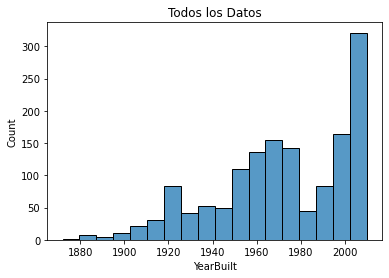

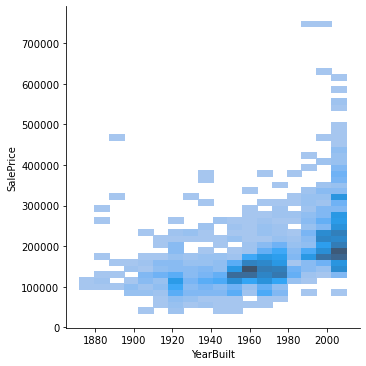

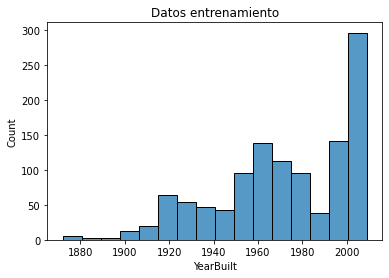

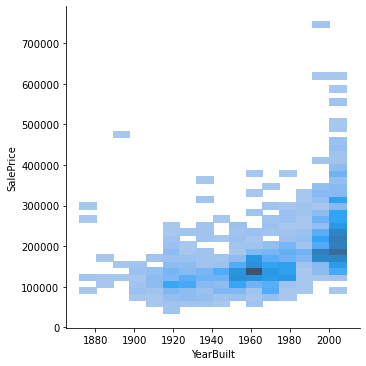

In [13]:
aX4 = sns.histplot(data=X4)
aX4.set_xlabel("YearBuilt")
aX4.set_title("Todos los Datos")
bX4 = sns.displot(y=Y, x=X4)
bX4.set_axis_labels("YearBuilt", "SalePrice")
plt.show()

aX4_entrenamiento = sns.histplot(data=X4_entrenamiento)
aX4_entrenamiento.set_xlabel("YearBuilt")
aX4_entrenamiento.set_title("Datos entrenamiento")
bX4_entrenamiento = sns.displot(y=Y_entrenamiento, x=X4_entrenamiento)
bX4_entrenamiento.set_axis_labels("YearBuilt", "SalePrice")

________________________________________________________________________
X5 = LotFrontage  

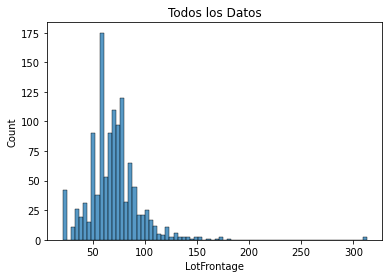

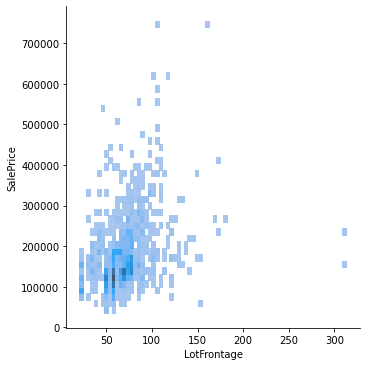

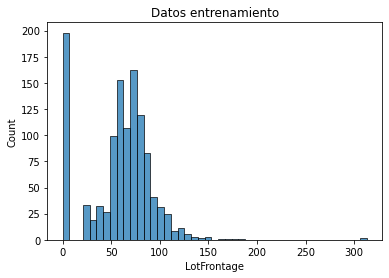

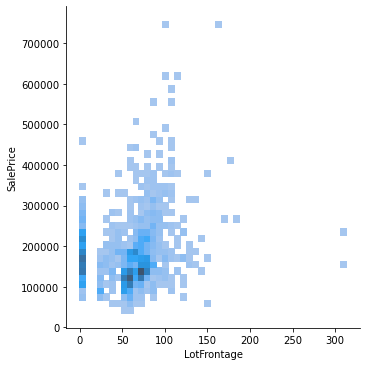

In [14]:
aX5 = sns.histplot(data=X5)
aX5.set_xlabel("LotFrontage")
aX5.set_title("Todos los Datos")
bX5 = sns.displot(y=Y, x=X5)
bX5.set_axis_labels("LotFrontage", "SalePrice")
plt.show()

aX5_entrenamiento = sns.histplot(data=X5_entrenamiento)
aX5_entrenamiento.set_xlabel("LotFrontage")
aX5_entrenamiento.set_title("Datos entrenamiento")
bX5_entrenamiento = sns.displot(y=Y_entrenamiento, x=X5_entrenamiento)
bX5_entrenamiento.set_axis_labels("LotFrontage", "SalePrice")

  5. Para cada variable independiente x :
 - Calcular el coeficiente de correlación entre x y y.
 - Graficar x vs y (scatterplot) usando matplotlib.
 - Colocar el coeficiente de correlación como parte del título de la gráfica.
 - Basado en la gráfica y el coeficiente de correlación de cada par (x,y) elegir las 2 variables con más potencial predictivo. Es decir, las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente.
 
(para esto se utilizó sólo los datos de entrenamiento)

________________________________________________________________________
X1 = OverallQual  

El coeficiente de correlación entre el precio de venta y la calidad general del material y el acabado es:  0.79325


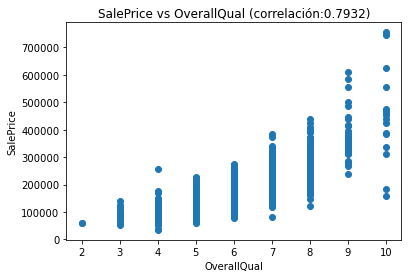

In [15]:
rho_Y_X1=np.corrcoef(x=X1_entrenamiento,y=Y_entrenamiento)[1][0]
print("El coeficiente de correlación entre el precio de venta y la calidad general del material y el acabado es: ", round(rho_Y_X1,5))
plt.scatter(X1_entrenamiento,Y_entrenamiento)
plt.title("SalePrice vs OverallQual (correlación:"+str(round(rho_Y_X1,4))+")")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

________________________________________________________________________
X2 = 1stFlrSF  

El coeficiente de correlación entre el precio de venta y el área del primer piso (ft²) de las propiedades es:  0.6045


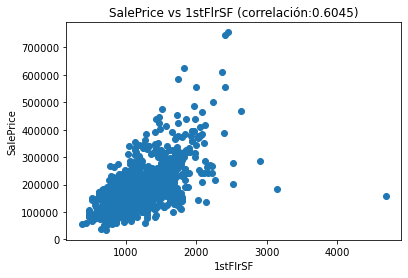

In [16]:
rho_Y_X2=np.corrcoef(x=X2_entrenamiento,y=Y_entrenamiento)[1][0]
print("El coeficiente de correlación entre el precio de venta y el área del primer piso (ft²) de las propiedades es: ", round(rho_Y_X2,4))
plt.scatter(X2_entrenamiento,Y_entrenamiento)
plt.title("SalePrice vs 1stFlrSF (correlación:"+str(round(rho_Y_X2,4))+")")
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.show()

________________________________________________________________________
X3 = TotRmsAbvGrd 

El coeficiente de correlación entre el precio de venta y el total de habitaciones sobre rasante es:  0.5403


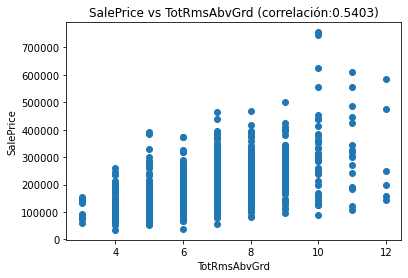

In [17]:
rho_Y_X3=np.corrcoef(x=X3_entrenamiento,y=Y_entrenamiento)[1][0]
print("El coeficiente de correlación entre el precio de venta y el total de habitaciones sobre rasante es: ", round(rho_Y_X3,4))
plt.scatter(X3_entrenamiento,Y_entrenamiento)
plt.title("SalePrice vs TotRmsAbvGrd (correlación:"+str(round(rho_Y_X3,4))+")")
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.show()

________________________________________________________________________
X4 = YearBuilt 

El coeficiente de correlación entre el precio de venta y el año de construcción es:  0.522


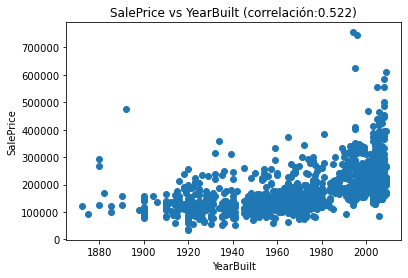

In [18]:
rho_Y_X4=np.corrcoef(x=X4_entrenamiento,y=Y_entrenamiento)[1][0]
print("El coeficiente de correlación entre el precio de venta y el año de construcción es: ", round(rho_Y_X4,4))
plt.scatter(X4_entrenamiento,Y_entrenamiento)
plt.title("SalePrice vs YearBuilt (correlación:"+str(round(rho_Y_X4,4))+")")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()

________________________________________________________________________
X5 = LotFrontage  

El coeficiente de correlación entre el precio de venta y pies lineales de calle conectados a las propiedades es:  0.2169


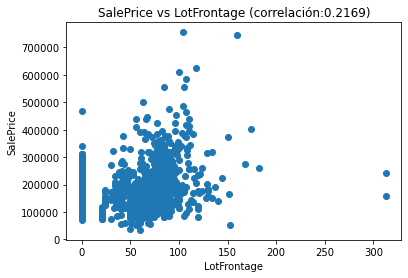

In [19]:
rho_Y_X5=np.corrcoef(x=X5_entrenamiento,y=Y_entrenamiento)[1][0]
print("El coeficiente de correlación entre el precio de venta y pies lineales de calle conectados a las propiedades es: ", round(rho_Y_X5,4))
plt.scatter(X5_entrenamiento,Y_entrenamiento)
plt.title("SalePrice vs LotFrontage (correlación:"+str(round(rho_Y_X5,4))+")")
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show()

Con base en las gráficas y los coeficiente de correlación entre cada variable X y la variable Y se elegió las 2 variables con más potencial predictivo, que son **X1 = OverallQual** y **X2 = 1stFlrSF**.

 6. Crear una función para entrenar un modelo de regresión lineal de una variable y = β0 + β1 ∗ x. La función recibe como argumentos:
     - 6.1 Vector con la variable independiente x,
     - 6.2 Vector con la variable dependiente y,
     - 6.3 un entero **epochs** que indica por cuantas iteraciones entrenar el modelo.
     - 6.4 un entero **imprimir_error_cada** , que nos indica cada cuantas iteraciones queremos imprimir a través de print: el número de iteración, el error del modelo en esa iteración, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50.
     - 6.5 escalar **α(learning rate)**: es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.

7. Para crear su función debe considerar lo siguiente:
    - Crear una matriz de 2 columnas, la primera columna corresponde al vector de datos x y la segunda columna de la matriz para todas las filas es igual a 1.
    - Inicializar los parámetros del modelo en un vector β0 y β1, esto es equivalente a empezar el proceso con una recta inicial la cual en cada iteración actualizaremos hasta encontrar una que aproxime de buena manera los datos x, y.
    - por cada epoch(iteración) debe:
        - Calcular yˆ(predicción o estimación) para todas las observaciones de manera simultánea(vectorizada) utilizando el modelo correspondiente a la iteración (es decir , los valores de β0 y β1): esto produce un vector yˆ con el mismo número de elementos que y. 
        - Calcular el error o costo usando: y ,yˆ.
        - Almacenar en un vector el error de cada iteración.
        - Calcular el gradiente del error respecto de cada parámetro.
        - Actualizar los parámetros del modelo.
        - Almacenar en una estructura de datos el modelo resultante.
        - La función devuelve 2 resultados: La estructura de datos conteniendo el modelo de cada iteración y el error de cada iteración.
        - Crear una función que nos permita visualizar con matplotlib cómo cambia el error en el tiempo.
        - Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo.
        - Utilizar las funciones del punto anterior para entrenar modelos de regresión lineal y = β0 + β1 ∗ x , para cada una de las variables x elegidas.
        - Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal.
        - Para cada variable independiente x elegida, crear una función que usando el modelo entrenado manualmente y el modelo de scikit-learn(enviados como par ́ametros a la función) calcule la estimación o predicción de cada uno de estos y devuelva como resultado una predicción estimada promediando las predicciones de los 2 modelos, la función debe recibir como parámetro adicional un vector de cualquier tamaño de x y devolver 3 vectores cada uno del mismo tamaño del vector x, estos vectores son:
            - La predicción con el modelo entrenado manualmente 
            - La predicción con el modelo de scikit-learn
            - La combinación(promedio) de las 2 anteriores.
        - Usando el 20% de los datos de validación, aplicamos los modelos predictivos para estimar la variable dependiente y usando los valores reales de y calculamos el error de cada modelo. Para cada variable independiente x elegida:
            - Graficar el error de cada modelo para esta variable ?x?
            - Concluir cuál modelo para la variable ?x? es el mejor a ser usado (error más bajo)
    - Todo este desarrollo debe hacerse por medio de programación orientada a objetos, es decir que deberá crear una clase que realice todo lo mencionado y posea los campos y métodos necesarios para que funcione correctamente

In [68]:
#Función error_costo utilizada por el entrenador lineal para calcular el costo dados los parámetros
def error_costo(x,y,beta0,beta1):   #indica el error producido por el modelo correspondiente a la iteración
    costo=0.0
    for i in range(len(x)):
        pred=beta0+beta1*x[i]
        costo=(y[i]-pred)**2
    costo=costo/(2*len(x))
    return costo

#Función para graficar el error
def grafica_error(error):
    iteracion=range(len(error))
    plt.scatter(iteracion, error, marker='o')


#Función para visualizar cómo evoluciona el modelo entrenado en el tiempo 
def grafica_evolucion_modelo(historial_modelo, graficar_cada,x,y):   
    #historial_modelo = estructura de datos conteniendo el historial de modelos
    #graficar_cada = un valor ?n? que indica cada cuantas iteraciones graficar el modelo resultante
    z= np.linspace(min(x),x[3],100)
    plt.plot(z,z*historial_modelo[0][0]+historial_modelo[0][1])
    plt.scatter(x,y,marker='.')
    for i in range(len(historial_modelo)):
        if i%graficar_cada==0:
            plt.plot(x,x*historial_modelo[i][1]+historial_modelo[i][0])
    plt.show()  

class Gradient_Descent:
    
    def __init__(self, x, y): # The constructor
        super.__init__()
        self.x = x
        self.y = y
    
    #Función Entrenador Lineal
    def entrenador_lineal(x,y,epochs,imprimir_error_cada,alpha):
        
        if len(x)!=len(y):    #verificación que los vectores ingresados son de la misma dimensión
            print("Los vectores ingresados no son del mismo tamaño!")
            return None
        
        matrizX=np.ones((len(y),2))
        for i in range(len(y)):
            matrizX[i][0]=x[i] 
        print(matrizX)       #Creación de la matriz de 2 columnas, la primera columna corresponde al vector de datos x y la segunda columna de la matriz para todas las filas es igual a 1.

        i_random_choice=random.choice(range(len(y)))  
        print("i_random: ",i_random_choice, "X: ",x[i_random_choice],"Y: ",y[i_random_choice])
        beta1=y[i_random_choice]/x[i_random_choice] #se inicializa beta1 con la pendiente dada por un valor aleatorio
        beta0=0 #se inicializa beta0 con un valor nulo
        
        hist_costo=[]          #Para almacenar el error de cada iteración
        hist_costo.append(error_costo(x,y,beta0,beta1))  #se almacena el error inicial
        parametros_modelo=[]   #Para almacenar los parámetros de cada iteración
        parametros_modelo.append([beta0,beta1])   #se almacenan los parámetros iniciales
        y_predicciones=[]      #Para almacenar las predicciones del modelo dados los parámetros de la iteración
        y_predicciones.append(np.dot(matrizX,[beta1,beta0])) #se almacenan
        
        for epo in range(epochs):  #epoch(iteración) 
            beta0_d=0.0
            beta1_d=0.0
            for i in range(len(y)):
                pred=beta0+beta1*x[i]
                beta1_d+=(pred-y[i])*x[i]
                beta0_d+=pred-y[i]
            beta0 -=(beta0_d/len(y))*alpha
            beta1 -=(beta1_d/len(y))*alpha
            hist_costo.append(error_costo(x,y,beta0,beta1)) #almacenar error de la iteración
            parametros_modelo.append([beta0,beta1])   #almacenar parámetros de la iteración
            y_predicciones.append(np.dot(matrizX,[beta1,beta0]))  #Calcular yˆ(predicción) para todas las observaciones de manera vectorizada
            if epo%imprimir_error_cada==0:
                print("Costo iteración #"+str(epo)+": "+str(error_costo(x,y,beta0,beta1)))
            if error_costo(x,y,beta0,beta1)<2:   #si el error es muy bajo, se utilizan los parámetros encontrados
                print("costo bajo:",error_costo(x,y,beta0,beta1))
                break
        beta=[beta1,beta0]
        y_pred=np.dot(matrizX,beta)
        estructura_datos_modelo=dict(zip(list(range(0,epochs+1)), parametros_modelo))
        #La estructura de datos es un diccionario donde la llave es el número de iteración (0 corresponde a los parámetros iniciales)
        #  y el valor es un vector con los parámetros beta 0 y beta 1
        return estructura_datos_modelo, hist_costo
    
  
    
  

Aplicación del modelado desarrollado para X1 y X2

[[6. 1.]
 [7. 1.]
 [8. 1.]
 ...
 [6. 1.]
 [6. 1.]
 [5. 1.]]
i_random:  292 X:  7.0 Y:  219500.0
Costo iteración #0: 35895.722290109465
Costo iteración #10: 27930.97278029462
Costo iteración #20: 22800.915773719098
Costo iteración #30: 19416.58934420396
Costo iteración #40: 17135.860755997674
Costo iteración #50: 15570.021310588632
Costo iteración #60: 14477.420293954523
Costo iteración #70: 13703.925051174601
Costo iteración #80: 13148.887214765993
Costo iteración #90: 12745.219489159712


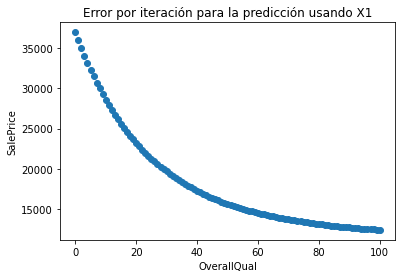

[[1.262e+03 1.000e+00]
 [9.200e+02 1.000e+00]
 [1.145e+03 1.000e+00]
 ...
 [9.530e+02 1.000e+00]
 [2.073e+03 1.000e+00]
 [1.256e+03 1.000e+00]]
i_random:  171 X:  630.0 Y:  112000.0
Costo iteración #0: 2218460.802177041
Costo iteración #10: 1160148.9546413017
Costo iteración #20: 930333.524167068
Costo iteración #30: 872000.8116587875
Costo iteración #40: 856405.0654564667
Costo iteración #50: 852172.1380955172
Costo iteración #60: 851018.4435096238
Costo iteración #70: 850703.6423410524
Costo iteración #80: 850617.7195719099
Costo iteración #90: 850594.2674658244


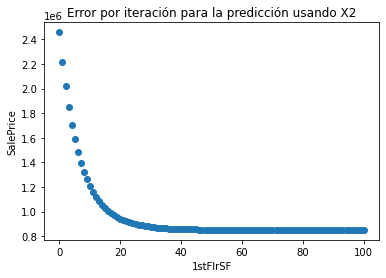

[[6. 1.]
 [7. 1.]
 [8. 1.]
 ...
 [6. 1.]
 [6. 1.]
 [5. 1.]]
i_random:  421 X:  6.0 Y:  200624.0
Costo iteración #0: 165122.72736135137
Costo iteración #10: 157491.78662983226
Costo iteración #20: 150275.71311880782
Costo iteración #30: 143450.51502721186
Costo iteración #40: 136993.6407106146


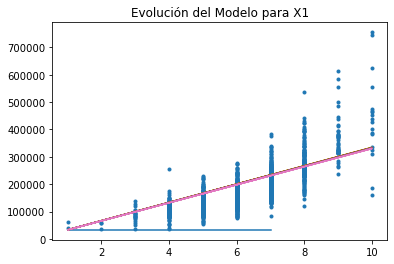

[[1.262e+03 1.000e+00]
 [9.200e+02 1.000e+00]
 [1.145e+03 1.000e+00]
 ...
 [9.530e+02 1.000e+00]
 [2.073e+03 1.000e+00]
 [1.256e+03 1.000e+00]]
i_random:  580 X:  1232.0 Y:  194500.0
Costo iteración #0: 1071593.1303470954
Costo iteración #10: 908386.939964491
Costo iteración #20: 866175.7749651442
Costo iteración #30: 854827.3092011635
Costo iteración #40: 851742.3703791181
Costo iteración #50: 850901.2045516616
Costo iteración #60: 850671.6550002518
Costo iteración #70: 850608.9997784776
Costo iteración #80: 850591.8989759556
Costo iteración #90: 850587.2334073721


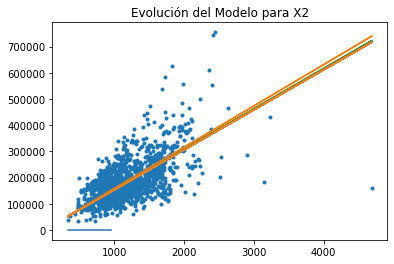

In [70]:
#print("Error del modelo por iteración: ", Gradient_Descent.entrenador_lineal(X1,Y,100,10,0.0008)[1])
clase=Gradient_Descent
GraficaX1=grafica_error(clase.entrenador_lineal(X1_entrenamiento,Y_entrenamiento,100,10,0.0008)[1])
plt.title("Error por iteración para la predicción usando X1")
plt.xlabel("OverallQual") #X1 label
plt.ylabel("SalePrice") #Y label
plt.show()
GraficaX2=grafica_error(clase.entrenador_lineal(X2_entrenamiento,Y_entrenamiento,100,10,0.00000008)[1])
plt.title("Error por iteración para la predicción usando X2")
plt.xlabel("1stFlrSF") #X2 label
plt.ylabel("SalePrice") #Y label
plt.show()
#Grafica Evolución del Modelo para X1
plt.title("Evolución del Modelo para X1")
grafica_evolucion_modelo(clase.entrenador_lineal(X1_entrenamiento,Y_entrenamiento,50,10,0.00008)[0],10,X1,Y)
#Grafica Evolución del Modelo para X2
plt.title("Evolución del Modelo para X2")
grafica_evolucion_modelo(clase.entrenador_lineal(X2_entrenamiento,Y_entrenamiento,100,10,0.00000008)[0],10,X2,Y)


In [47]:
print(df.iloc[0])

SalePrice       208500.0
OverallQual          7.0
1stFlrSF           856.0
TotRmsAbvGrd         8.0
YearBuilt         2003.0
LotFrontage         65.0
Name: 0, dtype: float64
